In [1]:
import pickle

from model import *
#from model2 import *
from zipreg_model import *
from inference import *
from criticism import *

In [175]:
with open('data/demand_sample.pickle', 'rb') as f:
    data_samp = pickle.load(f)

In [17]:
coef = {}

for s in features['station']['names']:
    coef[s] = pyro.sample(s, dist.Normal(0, 1))

for s in features['hour']['names']:
    coef[s] = pyro.sample(s, dist.Normal(0, 1))

In [149]:
X = data
c = 0
list(X[76,:]).count(1)
for i in range(X.shape[1]):
    c = list(X[i,:]).count(1)
    assert(c==2),"data sample {} doesn't have an hour *and* station".format(i)

In [150]:
features

{'station': {'names': array(['station_2', 'station_3', 'station_4', 'station_5', 'station_6',
         'station_7', 'station_8', 'station_9', 'station_10', 'station_11',
         'station_12', 'station_13', 'station_14', 'station_16',
         'station_21', 'station_22', 'station_23', 'station_24',
         'station_25', 'station_26', 'station_27', 'station_28',
         'station_29', 'station_30', 'station_31', 'station_32',
         'station_33', 'station_34', 'station_35', 'station_36',
         'station_37', 'station_38', 'station_39', 'station_41',
         'station_42', 'station_45', 'station_46', 'station_47',
         'station_48', 'station_49', 'station_50', 'station_51',
         'station_54', 'station_55', 'station_56', 'station_57',
         'station_58', 'station_59', 'station_60', 'station_61',
         'station_62', 'station_63', 'station_64', 'station_65',
         'station_66', 'station_67', 'station_68', 'station_69',
         'station_70', 'station_71', 'station_72',

In [153]:
# RE-create the data matrix to suit the new model by multiplying the column_station_i with column_hour_j
stations = 70
hours = 24
N = X.shape[0] # number of samples of data
M = stations*hours # number of regressors that we have
X_new = torch.zeros(N,M)

X = data
count = 0
for i in range(stations):
    for j in range(stations,94,1):

        xij = torch.mul(X[:,i],X[:,j])
        X_new[:,count] = xij
        count +=1

# Sanity check that my new X matrix should have exactly one 1 in each row due to the 
# multiplication of column_i and column_j
for i in range(N):
    assert(list(X_new[i,:]).count(1)==1),"I expect exactly one 1 in each row, which didn't happen for row {}".format(i)


(tensor([0., 0., 0., 0., 0., 0., 0.]), tensor([1., 1., 1.,  ..., 0., 0., 0.]))

In [155]:
coef = {}
count = 0
log_lmbda = 0
for s1 in features['station']['names']:
    for s2 in features['hour']['names']:
        s = s1+s2
        coef[s] = pyro.sample(s, dist.Normal(0, 1))
        log_lmbda += coef[s] * X_new[:,count]
        count+=1


### Look at the log_lmbda. 
The same number appears in groups of 5 indicating the same station and hour for that data sample. Are we getting data samples for the same hour and 5 different days? Indeed that's the case when one opens data_samp it is clear.

In [164]:
# number of zeros in log_lmbda is the number of station_hour combinations that are not represented in our dataset sample
c = 0
for i in (log_lmbda):
    print(i)


tensor(-0.1520)
tensor(-0.1520)
tensor(-0.1520)
tensor(-0.1520)
tensor(-0.1520)
tensor(1.0428)
tensor(1.0428)
tensor(1.0428)
tensor(1.0428)
tensor(1.0428)
tensor(0.0501)
tensor(0.0501)
tensor(0.0501)
tensor(0.0501)
tensor(0.0501)
tensor(-0.9425)
tensor(-0.9425)
tensor(-0.9425)
tensor(-0.9425)
tensor(-0.9425)
tensor(-0.5098)
tensor(-0.5098)
tensor(-0.5098)
tensor(-0.5098)
tensor(-0.5098)
tensor(-0.5920)
tensor(-0.5920)
tensor(-0.5920)
tensor(-0.5920)
tensor(-0.5920)
tensor(-0.8693)
tensor(-0.8693)
tensor(-0.8693)
tensor(-0.8693)
tensor(-0.8693)
tensor(0.7683)
tensor(0.7683)
tensor(0.7683)
tensor(0.7683)
tensor(0.7683)
tensor(-0.8987)
tensor(-0.8987)
tensor(-0.8987)
tensor(-0.8987)
tensor(-0.8987)
tensor(-0.6051)
tensor(-0.6051)
tensor(-0.6051)
tensor(-0.6051)
tensor(-0.6051)
tensor(0.4095)
tensor(0.4095)
tensor(0.4095)
tensor(0.4095)
tensor(0.4095)
tensor(-0.7811)
tensor(-0.7811)
tensor(-0.7811)
tensor(-0.7811)
tensor(-0.7811)
tensor(0.8002)
tensor(0.8002)
tensor(0.8002)
tensor(0.8002)


tensor(-0.4707)
tensor(-0.4707)
tensor(1.5381)
tensor(1.5381)
tensor(1.5381)
tensor(1.5381)
tensor(1.5381)
tensor(0.8588)
tensor(0.8588)
tensor(0.8588)
tensor(0.8588)
tensor(0.8588)
tensor(-1.6127)
tensor(-1.6127)
tensor(-1.6127)
tensor(-1.6127)
tensor(-1.6127)
tensor(0.3863)
tensor(0.3863)
tensor(0.3863)
tensor(0.3863)
tensor(0.3863)
tensor(1.1509)
tensor(1.1509)
tensor(1.1509)
tensor(1.1509)
tensor(1.1509)
tensor(-1.7911)
tensor(-1.7911)
tensor(-1.7911)
tensor(-1.7911)
tensor(-1.7911)
tensor(-0.2144)
tensor(-0.2144)
tensor(-0.2144)
tensor(-0.2144)
tensor(-0.2144)
tensor(0.6110)
tensor(0.6110)
tensor(0.6110)
tensor(0.6110)
tensor(0.6110)
tensor(2.6992)
tensor(2.6992)
tensor(2.6992)
tensor(2.6992)
tensor(2.6992)
tensor(-0.0744)
tensor(-0.0744)
tensor(-0.0744)
tensor(-0.0744)
tensor(-0.0744)
tensor(0.0937)
tensor(0.0937)
tensor(0.0937)
tensor(0.0937)
tensor(0.0937)
tensor(-0.0059)
tensor(-0.0059)
tensor(-0.0059)
tensor(-0.0059)
tensor(-0.0059)
tensor(-0.8711)
tensor(-0.8711)
tensor(-0.8

tensor(-1.4026)
tensor(-1.4026)
tensor(-1.4026)
tensor(-1.4026)
tensor(-1.4026)
tensor(1.4679)
tensor(1.4679)
tensor(1.4679)
tensor(1.4679)
tensor(1.4679)
tensor(-0.0405)
tensor(-0.0405)
tensor(-0.0405)
tensor(-0.0405)
tensor(-0.0405)
tensor(0.6779)
tensor(0.6779)
tensor(0.6779)
tensor(0.6779)
tensor(0.6779)
tensor(0.0576)
tensor(0.0576)
tensor(0.0576)
tensor(0.0576)
tensor(0.0576)
tensor(-0.0591)
tensor(-0.0591)
tensor(-0.0591)
tensor(-0.0591)
tensor(-0.0591)
tensor(0.3223)
tensor(0.3223)
tensor(0.3223)
tensor(0.3223)
tensor(0.3223)
tensor(1.1011)
tensor(1.1011)
tensor(1.1011)
tensor(1.1011)
tensor(1.1011)
tensor(-0.5257)
tensor(-0.5257)
tensor(-0.5257)
tensor(-0.5257)
tensor(-0.5257)
tensor(0.2703)
tensor(0.2703)
tensor(0.2703)
tensor(0.2703)
tensor(0.2703)
tensor(-0.6544)
tensor(-0.6544)
tensor(-0.6544)
tensor(-0.6544)
tensor(-0.6544)
tensor(0.5293)
tensor(0.5293)
tensor(0.5293)
tensor(0.5293)
tensor(0.5293)
tensor(0.3149)
tensor(0.3149)
tensor(0.3149)
tensor(0.3149)
tensor(0.3149)


tensor(-0.5288)
tensor(-0.5288)
tensor(-0.5288)
tensor(-0.5288)
tensor(-0.5288)
tensor(0.4186)
tensor(0.4186)
tensor(0.4186)
tensor(0.4186)
tensor(0.4186)
tensor(0.6819)
tensor(0.6819)
tensor(0.6819)
tensor(0.6819)
tensor(0.6819)
tensor(-0.0894)
tensor(-0.0894)
tensor(-0.0894)
tensor(-0.0894)
tensor(-0.0894)
tensor(0.6483)
tensor(0.6483)
tensor(0.6483)
tensor(0.6483)
tensor(0.6483)
tensor(-1.4394)
tensor(-1.4394)
tensor(-1.4394)
tensor(-1.4394)
tensor(-1.4394)
tensor(1.1152)
tensor(1.1152)
tensor(1.1152)
tensor(1.1152)
tensor(1.1152)
tensor(0.4235)
tensor(0.4235)
tensor(0.4235)
tensor(0.4235)
tensor(0.4235)
tensor(0.7750)
tensor(0.7750)
tensor(0.7750)
tensor(0.7750)
tensor(0.7750)
tensor(-2.0641)
tensor(-2.0641)
tensor(-2.0641)
tensor(-2.0641)
tensor(-2.0641)
tensor(-0.4007)
tensor(-0.4007)
tensor(-0.4007)
tensor(-0.4007)
tensor(-0.4007)
tensor(-0.1962)
tensor(-0.1962)
tensor(-0.1962)
tensor(-0.1962)
tensor(-0.1962)
tensor(0.3468)
tensor(0.3468)
tensor(0.3468)
tensor(0.3468)
tensor(0.3

tensor(0.9949)
tensor(-1.0681)
tensor(-1.0681)
tensor(-1.0681)
tensor(-1.0681)
tensor(-1.0681)
tensor(-0.0864)
tensor(-0.0864)
tensor(-0.0864)
tensor(-0.0864)
tensor(-0.0864)
tensor(0.7208)
tensor(0.7208)
tensor(0.7208)
tensor(0.7208)
tensor(0.7208)
tensor(0.8370)
tensor(0.8370)
tensor(0.8370)
tensor(0.8370)
tensor(0.8370)
tensor(-0.8479)
tensor(-0.8479)
tensor(-0.8479)
tensor(-0.8479)
tensor(-0.8479)
tensor(0.2158)
tensor(0.2158)
tensor(0.2158)
tensor(0.2158)
tensor(0.2158)
tensor(0.5107)
tensor(0.5107)
tensor(0.5107)
tensor(0.5107)
tensor(0.5107)
tensor(0.1573)
tensor(0.1573)
tensor(0.1573)
tensor(0.1573)
tensor(0.1573)
tensor(-0.6419)
tensor(-0.6419)
tensor(-0.6419)
tensor(-0.6419)
tensor(-0.6419)
tensor(0.4529)
tensor(0.4529)
tensor(0.4529)
tensor(0.4529)
tensor(0.4529)
tensor(0.8550)
tensor(0.8550)
tensor(0.8550)
tensor(0.8550)
tensor(0.8550)
tensor(1.1995)
tensor(1.1995)
tensor(1.1995)
tensor(1.1995)
tensor(1.1995)
tensor(1.1833)
tensor(1.1833)
tensor(1.1833)
tensor(1.1833)
tenso

tensor(0.8919)
tensor(-0.4071)
tensor(-0.4071)
tensor(-0.4071)
tensor(-0.4071)
tensor(-0.4071)
tensor(-0.6886)
tensor(-0.6886)
tensor(-0.6886)
tensor(-0.6886)
tensor(-0.6886)
tensor(-0.3547)
tensor(-0.3547)
tensor(-0.3547)
tensor(-0.3547)
tensor(-0.3547)
tensor(-0.2425)
tensor(-0.2425)
tensor(-0.2425)
tensor(-0.2425)
tensor(-0.2425)
tensor(0.5952)
tensor(0.5952)
tensor(0.5952)
tensor(0.5952)
tensor(0.5952)
tensor(0.7507)
tensor(0.7507)
tensor(0.7507)
tensor(0.7507)
tensor(0.7507)
tensor(-0.2868)
tensor(-0.2868)
tensor(-0.2868)
tensor(-0.2868)
tensor(-0.2868)
tensor(0.9790)
tensor(0.9790)
tensor(0.9790)
tensor(0.9790)
tensor(0.9790)
tensor(1.5079)
tensor(1.5079)
tensor(1.5079)
tensor(1.5079)
tensor(1.5079)
tensor(0.4820)
tensor(0.4820)
tensor(0.4820)
tensor(0.4820)
tensor(0.4820)
tensor(-0.9679)
tensor(-0.9679)
tensor(-0.9679)
tensor(-0.9679)
tensor(-0.9679)
tensor(-0.0596)
tensor(-0.0596)
tensor(-0.0596)
tensor(-0.0596)
tensor(-0.0596)
tensor(0.0053)
tensor(0.0053)
tensor(0.0053)
tenso

tensor(-1.1063)
tensor(-1.1063)
tensor(-1.1063)
tensor(-1.1063)
tensor(-1.1063)
tensor(0.3246)
tensor(0.3246)
tensor(0.3246)
tensor(0.3246)
tensor(0.3246)
tensor(1.6212)
tensor(1.6212)
tensor(1.6212)
tensor(1.6212)
tensor(1.6212)
tensor(0.2471)
tensor(0.2471)
tensor(0.2471)
tensor(0.2471)
tensor(0.2471)
tensor(-0.8020)
tensor(-0.8020)
tensor(-0.8020)
tensor(-0.8020)
tensor(-0.8020)
tensor(-0.4696)
tensor(-0.4696)
tensor(-0.4696)
tensor(-0.4696)
tensor(-0.4696)
tensor(-0.7007)
tensor(-0.7007)
tensor(-0.7007)
tensor(-0.7007)
tensor(-0.7007)
tensor(0.5952)
tensor(0.5952)
tensor(0.5952)
tensor(0.5952)
tensor(0.5952)
tensor(-0.4734)
tensor(-0.4734)
tensor(-0.4734)
tensor(-0.4734)
tensor(-0.4734)
tensor(-1.6623)
tensor(-1.6623)
tensor(-1.6623)
tensor(-1.6623)
tensor(-1.6623)
tensor(-0.3583)
tensor(-0.3583)
tensor(-0.3583)
tensor(-0.3583)
tensor(-0.3583)
tensor(0.2285)
tensor(0.2285)
tensor(0.2285)
tensor(0.2285)
tensor(0.2285)
tensor(1.0830)
tensor(1.0830)
tensor(1.0830)
tensor(1.0830)
tenso

tensor(1.9512)
tensor(1.9512)
tensor(1.9512)
tensor(-0.0693)
tensor(-0.0693)
tensor(-0.0693)
tensor(-0.0693)
tensor(-0.0693)
tensor(0.3222)
tensor(0.3222)
tensor(0.3222)
tensor(0.3222)
tensor(0.3222)
tensor(-0.6781)
tensor(-0.6781)
tensor(-0.6781)
tensor(-0.6781)
tensor(-0.6781)
tensor(-0.6113)
tensor(-0.6113)
tensor(-0.6113)
tensor(-0.6113)
tensor(-0.6113)
tensor(-0.5933)
tensor(-0.5933)
tensor(-0.5933)
tensor(-0.5933)
tensor(-0.5933)
tensor(0.1192)
tensor(0.1192)
tensor(0.1192)
tensor(0.1192)
tensor(0.1192)
tensor(-0.8351)
tensor(-0.8351)
tensor(-0.8351)
tensor(-0.8351)
tensor(-0.8351)
tensor(0.7332)
tensor(0.7332)
tensor(0.7332)
tensor(0.7332)
tensor(0.7332)
tensor(-0.2088)
tensor(-0.2088)
tensor(-0.2088)
tensor(-0.2088)
tensor(-0.2088)
tensor(1.3018)
tensor(1.3018)
tensor(1.3018)
tensor(1.3018)
tensor(1.3018)
tensor(2.1764)
tensor(2.1764)
tensor(2.1764)
tensor(2.1764)
tensor(2.1764)
tensor(-0.4986)
tensor(-0.4986)
tensor(-0.4986)
tensor(-0.4986)
tensor(-0.4986)
tensor(-0.7947)
tens

tensor(-0.2681)
tensor(-0.2681)
tensor(-0.2681)
tensor(-0.2681)
tensor(-0.2681)
tensor(-0.5349)
tensor(-0.5349)
tensor(-0.5349)
tensor(-0.5349)
tensor(-0.5349)
tensor(0.8443)
tensor(0.8443)
tensor(0.8443)
tensor(0.8443)
tensor(0.8443)
tensor(0.2602)
tensor(0.2602)
tensor(0.2602)
tensor(0.2602)
tensor(0.2602)
tensor(-0.1445)
tensor(-0.1445)
tensor(-0.1445)
tensor(-0.1445)
tensor(-0.1445)
tensor(-0.2601)
tensor(-0.2601)
tensor(-0.2601)
tensor(-0.2601)
tensor(-0.2601)
tensor(-0.5412)
tensor(-0.5412)
tensor(-0.5412)
tensor(-0.5412)
tensor(-0.5412)
tensor(-0.3856)
tensor(-0.3856)
tensor(-0.3856)
tensor(-0.3856)
tensor(-0.3856)
tensor(0.2567)
tensor(0.2567)
tensor(0.2567)
tensor(0.2567)
tensor(0.2567)
tensor(0.0844)
tensor(0.0844)
tensor(0.0844)
tensor(0.0844)
tensor(0.0844)
tensor(1.3540)
tensor(1.3540)
tensor(1.3540)
tensor(1.3540)
tensor(1.3540)
tensor(0.7919)
tensor(0.7919)
tensor(0.7919)
tensor(0.7919)
tensor(0.7919)
tensor(-0.2077)
tensor(-0.2077)
tensor(-0.2077)
tensor(-0.2077)
tensor

tensor(-0.2998)
tensor(0.5544)
tensor(0.5544)
tensor(0.5544)
tensor(0.5544)
tensor(0.5544)
tensor(0.8445)
tensor(0.8445)
tensor(0.8445)
tensor(0.8445)
tensor(0.8445)
tensor(0.3864)
tensor(0.3864)
tensor(0.3864)
tensor(0.3864)
tensor(0.3864)
tensor(-0.6475)
tensor(-0.6475)
tensor(-0.6475)
tensor(-0.6475)
tensor(-0.6475)
tensor(-0.2257)
tensor(-0.2257)
tensor(-0.2257)
tensor(-0.2257)
tensor(-0.2257)
tensor(-0.1898)
tensor(-0.1898)
tensor(-0.1898)
tensor(-0.1898)
tensor(-0.1898)
tensor(1.7327)
tensor(1.7327)
tensor(1.7327)
tensor(1.7327)
tensor(1.7327)
tensor(-0.3127)
tensor(-0.3127)
tensor(-0.3127)
tensor(-0.3127)
tensor(-0.3127)
tensor(0.4101)
tensor(0.4101)
tensor(0.4101)
tensor(0.4101)
tensor(0.4101)
tensor(1.6213)
tensor(1.6213)
tensor(1.6213)
tensor(1.6213)
tensor(1.6213)
tensor(-0.2757)
tensor(-0.2757)
tensor(-0.2757)
tensor(-0.2757)
tensor(-0.2757)
tensor(1.4590)
tensor(1.4590)
tensor(1.4590)
tensor(1.4590)
tensor(1.4590)
tensor(-0.3182)
tensor(-0.3182)
tensor(-0.3182)
tensor(-0.3

tensor(-0.8052)
tensor(-0.8052)
tensor(0.6197)
tensor(0.6197)
tensor(0.6197)
tensor(0.6197)
tensor(0.6197)
tensor(0.5514)
tensor(0.5514)
tensor(0.5514)
tensor(0.5514)
tensor(0.5514)
tensor(0.0012)
tensor(0.0012)
tensor(0.0012)
tensor(0.0012)
tensor(0.0012)
tensor(0.5362)
tensor(0.5362)
tensor(0.5362)
tensor(0.5362)
tensor(0.5362)
tensor(-0.5058)
tensor(-0.5058)
tensor(-0.5058)
tensor(-0.5058)
tensor(-0.5058)
tensor(1.0802)
tensor(1.0802)
tensor(1.0802)
tensor(1.0802)
tensor(1.0802)
tensor(1.0948)
tensor(1.0948)
tensor(1.0948)
tensor(1.0948)
tensor(1.0948)
tensor(1.3727)
tensor(1.3727)
tensor(1.3727)
tensor(1.3727)
tensor(1.3727)
tensor(-0.0087)
tensor(-0.0087)
tensor(-0.0087)
tensor(-0.0087)
tensor(-0.0087)
tensor(0.3951)
tensor(0.3951)
tensor(0.3951)
tensor(0.3951)
tensor(0.3951)
tensor(-0.1746)
tensor(-0.1746)
tensor(-0.1746)
tensor(-0.1746)
tensor(-0.1746)
tensor(-1.0950)
tensor(-1.0950)
tensor(-1.0950)
tensor(-1.0950)
tensor(-1.0950)
tensor(-0.7427)
tensor(-0.7427)
tensor(-0.7427)


In [ ]:
for i in range(len(coef)):
    coef[]

In [ ]:
log_lmbda = 0
for i in range(len(self.features['station']['names'])):
    name = self.features['station']['names'][i]
    
    
    index_st = self.features['station']['index'][i]
    index_hr = self.features['hour']['index'][j]
    
    log_lmbda += coef[name] * data[:, index_st] * data[:,index_hr]

for i in range(len(self.features['hour']['names'])):
    name = self.features['hour']['names'][i]
    index = self.features['hour']['index'][i]
    log_lmbda += coef[name] * data[:, index]

In [51]:
data, features = feature_generation(data_samp)
# features['hour']['names']
data  = data['data']
data

In [48]:
index=82

list(data[:, index]).count(1)
list(data[index,:]).count(1)

2

In [49]:
log_lmbda=0
for i in range(len(features['hour']['names'])):
    name = features['hour']['names'][i]
    print(name)
    index = features['hour']['index'][i]
    log_lmbda += coef[name] * data[:, index]

hour_0
hour_1
hour_2
hour_3
hour_4
hour_5
hour_6
hour_7
hour_8
hour_9
hour_10
hour_11
hour_12
hour_13
hour_14
hour_15
hour_16
hour_17
hour_18
hour_19
hour_20
hour_21
hour_22
hour_23


In [45]:
log_lmbda.shape

torch.Size([8400])

In [4]:
coef = {}

for s1 in features['station']['names']:
    for s2 in features['hour']['names']:
        s = s1+s2
        coef[s] = pyro.sample(s, dist.Normal(0, 1))

In [7]:
coef
# list(data['data'][:,4]).count(1)

{'station_2hour_0': tensor(0.6614),
 'station_2hour_1': tensor(0.2669),
 'station_2hour_2': tensor(0.0617),
 'station_2hour_3': tensor(0.6213),
 'station_2hour_4': tensor(-0.4519),
 'station_2hour_5': tensor(-0.1661),
 'station_2hour_6': tensor(-1.5228),
 'station_2hour_7': tensor(0.3817),
 'station_2hour_8': tensor(-1.0276),
 'station_2hour_9': tensor(-0.5631),
 'station_2hour_10': tensor(-0.8923),
 'station_2hour_11': tensor(-0.0583),
 'station_2hour_12': tensor(-0.1955),
 'station_2hour_13': tensor(-0.9656),
 'station_2hour_14': tensor(0.4224),
 'station_2hour_15': tensor(0.2673),
 'station_2hour_16': tensor(-0.4212),
 'station_2hour_17': tensor(-0.5107),
 'station_2hour_18': tensor(-1.5727),
 'station_2hour_19': tensor(-0.1232),
 'station_2hour_20': tensor(3.5870),
 'station_2hour_21': tensor(-1.8313),
 'station_2hour_22': tensor(1.5987),
 'station_2hour_23': tensor(-1.2770),
 'station_3hour_0': tensor(0.3255),
 'station_3hour_1': tensor(-0.4791),
 'station_3hour_2': tensor(1.3790)

In [7]:
data, features = feature_generation(data_samp)
# print(data["data"].shape)
data_data = data["data"]
data_demand = data["demand"]
# data["data"][150:250,0]
data_data[4,:]

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [4]:
p = ZIPoissReg(features, data)

In [169]:
with open('data/demand_sample.pickle', 'rb') as f:
    data_samp = pickle.load(f)


#global features
data, features = feature_generation(data_samp)
#p = PoissReg(features, data)
p = ZIPoissReg(features, data)

train_new = False

if train_new:
    svi, elbo_loss = run_svi(p.model, p.guide,
                             iters=5000,
                             data=data['data'],
                             demand=data['demand'],
                             filename='models/svi_zip_params.pkl')

    plot_elbo(elbo_loss)

    svi_posterior = get_svi_posterior(data['data'], data['demand'],
                                      svi=svi)

    print(svi.information_criterion())

else:
    svi_posterior = get_svi_posterior(data['data'], data['demand'],
                                    model = p.model2,
                                      guide = p.guide2,
                                      filename='models/svi_params.pkl')

post_samples = posterior_samples(
    p.wrapped_model,
    svi_posterior,
    data,
    ['obs','prediction'],
    num_samples=1000)


# post_samples = posterior_samples(
#     p.model,
#     svi_posterior,
#     data,
#     ['gate'],
#     num_samples=1000)


# post_samples = posterior_samples(
#     p.model,
#     svi_posterior,
#     data,
#     ['hour_amplitude','hour_period'],
#     num_samples=200)

# Example test statistics
# compare_test_statistic(data_samp.demand.values, post_samples[:,1,:],
#                        stat=perc_0)
# compare_test_statistic(data_samp.demand.values, post_samples[:, 1, :],
#                        stat=max)
# compare_test_statistic(data_samp.demand.values, post_samples[:, 1, :],
#                        stat=percentile, q=80)


# summary = site_summary(post_samples, ['obs','prediction'])

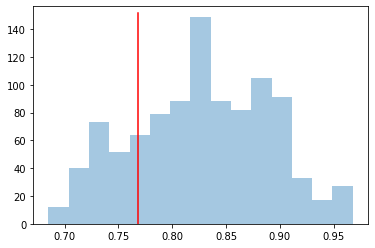

In [72]:
compare_test_statistic(data_samp.demand.values, post_samples[:,1,:],
                       stat=perc_0)

In [70]:
compare_test_statistic(data_samp.demand.values, post_samples[:, 1, :],
                       stat=max)
compare_test_statistic(data_samp.demand.values, post_samples[:, 1, :],
                       stat=percentile, q=80)


summary = site_summary(post_samples, ['obs','prediction'])

NameError: name 'post_samples' is not defined

In [186]:
summary = site_summary(post_samples, ['obs','prediction'])

/Users/nihaar/Documents/Fall19/ML_Probabilistic_Programming_Columbia/code/probprog-finalproject/zipreg_model.py:108: TracerWarning: Converting a tensor to a Python index might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  with pyro.plate("data", len(data)):
Elbo loss: 91329.890625
Elbo loss: 22393.037109375
Elbo loss: 1088482.875
Elbo loss: 58968.703125
Elbo loss: 13443.8369140625
Elbo loss: 14325.6376953125
Elbo loss: 23348.201171875
Elbo loss: 425943.9375
Elbo loss: 23552.03515625
Elbo loss: 14033.5634765625


OrderedDict([('waic', tensor(2.9506e+10, grad_fn=<SumBackward0>)), ('p_waic', tensor(1.4753e+10, grad_fn=<SumBackward0>))])


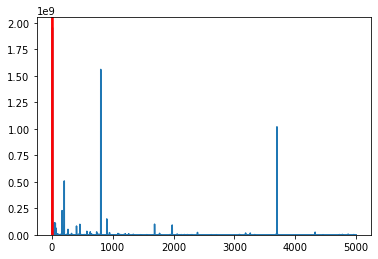

In [5]:
with open('data/demand_sample.pickle', 'rb') as f:
    data_samp = pickle.load(f)


#global features
data, features = feature_generation(data_samp)
#p = PoissReg(features, data)
p = ZIPoissReg(features, data)

train_new = False

if train_new:
    svi, elbo_loss = run_svi(p.model2, p.guide2,
                             iters=5000,
                             data=data['data'],
                             demand=data['demand'],
                             filename='models/svi_zip_params.pkl')

    plot_elbo(elbo_loss)

    svi_posterior = get_svi_posterior(data['data'], data['demand'],
                                      svi=svi)

    print(svi.information_criterion())

else:
    svi_posterior = get_svi_posterior(data['data'], data['demand'],
                                    model = p.model,
                                      guide = p.guide,
                                      filename='models/svi_zip_params.pkl')

post_samples = posterior_samples(
    p.wrapped_model,
    svi_posterior,
    data,
    ['obs','prediction'],
    num_samples=1000)


# post_samples = posterior_samples(
#     p.model,
#     svi_posterior,
#     data,
#     ['gate'],
#     num_samples=1000)


# post_samples = posterior_samples(
#     p.model,
#     svi_posterior,
#     data,
#     ['hour_amplitude','hour_period'],
#     num_samples=200)

# Example test statistics
compare_test_statistic(data_samp.demand.values, post_samples[:,1,:],
                       stat=perc_0)
compare_test_statistic(data_samp.demand.values, post_samples[:, 1, :],
                       stat=max)
compare_test_statistic(data_samp.demand.values, post_samples[:, 1, :],
                       stat=percentile, q=80)


summary = site_summary(post_samples, ['obs','prediction'])

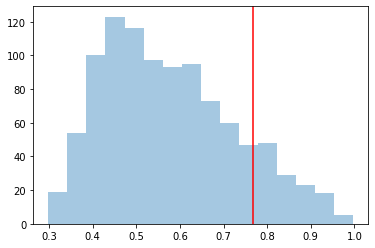

In [6]:
compare_test_statistic(data_samp.demand.values, post_samples[:,1,:],
                       stat=perc_0)

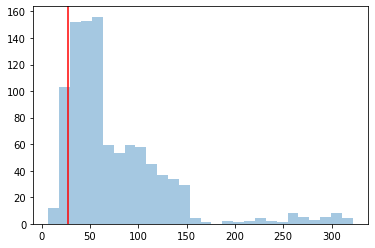

In [7]:
compare_test_statistic(data_samp.demand.values, post_samples[:, 1, :],
                       stat=max)

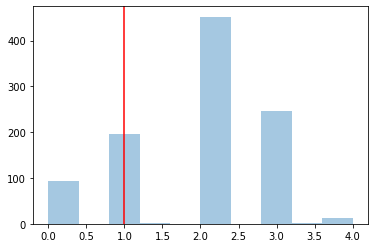

In [8]:
compare_test_statistic(data_samp.demand.values, post_samples[:, 1, :],
                       stat=percentile, q=80)

In [137]:


post_samples = posterior_samples(
    p.wrapped_model,
    svi_posterior,
    data,
    ['obs','prediction'],
    num_samples=200)

summary = site_summary(post_samples, ['obs','prediction'])

In [172]:
i = 8241
mu_i = summary["obs"]['mean'][i]
pred_i = summary["prediction"]['mean'][i]
print(mu_i,pred_i)

0.18000000715255737 0.12999999523162842


In [74]:
post_samples.shape

(1000, 2, 8400)

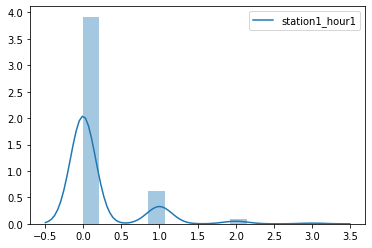

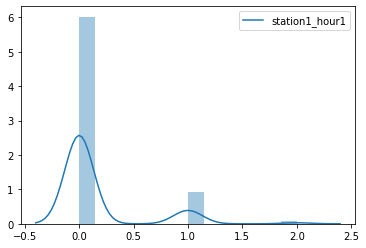

In [136]:
h0_s1 = post_samples[:,0,1] # 200 samples (i) for the 0th (j) hour for station 1 (k)
h1_s1 = post_samples[:,1,1] # 200 samples (i) for the 0th (j) hour for station 1 (k)
import seaborn as sns
# shows demand rate distribution for the specified hour and station
sns.distplot(h0_s1,kde_kws={"label": "station1_hour1"},)
plt.figure()
sns.distplot(h1_s1,kde_kws={"label": "station1_hour1"},)

In [139]:
h0_s1

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       2., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 2., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 3., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [62]:
summary# what is the mean here and why is it different from the observation or prediction?


{'obs':        mean       std   5%  25%  50%  75%   95%
 0     0.145  0.393381  0.0  0.0  0.0  0.0  1.00
 1     0.190  0.474368  0.0  0.0  0.0  0.0  1.00
 2     0.190  0.393285  0.0  0.0  0.0  0.0  1.00
 3     0.130  0.351737  0.0  0.0  0.0  0.0  1.00
 4     0.150  0.385021  0.0  0.0  0.0  0.0  1.00
 ...     ...       ...  ...  ...  ...  ...   ...
 8395  0.035  0.184241  0.0  0.0  0.0  0.0  0.00
 8396  0.045  0.207824  0.0  0.0  0.0  0.0  0.00
 8397  0.035  0.184241  0.0  0.0  0.0  0.0  0.00
 8398  0.055  0.249573  0.0  0.0  0.0  0.0  0.05
 8399  0.035  0.184241  0.0  0.0  0.0  0.0  0.00
 
 [8400 rows x 7 columns],
 'prediction':        mean       std   5%  25%  50%  75%  95%
 0     0.185  0.460254  0.0  0.0  0.0  0.0  1.0
 1     0.150  0.385021  0.0  0.0  0.0  0.0  1.0
 2     0.225  0.515464  0.0  0.0  0.0  0.0  1.0
 3     0.175  0.441986  0.0  0.0  0.0  0.0  1.0
 4     0.195  0.456087  0.0  0.0  0.0  0.0  1.0
 ...     ...       ...  ...  ...  ...  ...  ...
 8395  0.010  0.099748  0.0

In [91]:
def model_tmp(x):
    s = pyro.param("s",torch.Tensor([1.5]))
    z = pyro.sample("z",pyro.distributions.Normal(x,s))
    return z**2


In [97]:
trace = pyro.poutine.trace(model_tmp).get_trace(1.0)
logp = trace.log_prob_sum()

In [98]:
logp

tensor(-0.2278, grad_fn=<AddBackward0>)

In [99]:
params = [trace.nodes[name]["value"].unconstrained() for name in trace.param_nodes]

In [100]:
params

[tensor([0.5000], requires_grad=True)]

In [101]:
trace.nodes["z"]

{'type': 'sample',
 'name': 'z',
 'fn': Normal(loc: tensor([1.]), scale: tensor([0.5000], requires_grad=True)),
 'is_observed': False,
 'args': (),
 'kwargs': {},
 'value': tensor([0.9680], grad_fn=<AddBackward0>),
 'infer': {},
 'scale': 1.0,
 'mask': None,
 'cond_indep_stack': (),
 'done': True,
 'stop': False,
 'continuation': None,
 'log_prob_sum': tensor(-0.2278, grad_fn=<SumBackward0>)}

In [69]:
mask = df['start_station_id']==2
station_2_df = df.loc[mask]
mask2 = station_2_df['hour']==9
station_2_df_hour9 = station_2_df[mask2]
station_2_df_hour9


,date_hour,start_station_id,id_x,installation_date,start_station_name,demand,month,weekday,hour,date,...,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees
879150,2013-08-29 09:00:00,2,2,2013-08-06,0,0.0,8,3,9,2013-08-29,...,10.0,10.0,10.0,16.0,7.0,24.0,0,4.0,NaN,320.0
879174,2013-08-30 09:00:00,2,2,2013-08-06,0,0.0,8,4,9,2013-08-30,...,10.0,10.0,10.0,18.0,5.0,22.0,0,2.0,NaN,316.0
879198,2013-08-31 09:00:00,2,2,2013-08-06,0,0.0,8,5,9,2013-08-31,...,10.0,10.0,10.0,18.0,8.0,22.0,0,0.0,NaN,309.0
879222,2013-09-01 09:00:00,2,2,2013-08-06,0,0.0,9,6,9,2013-09-01,...,10.0,10.0,10.0,20.0,7.0,24.0,0,2.0,NaN,308.0
879246,2013-09-02 09:00:00,2,2,2013-08-06,0,0.0,9,0,9,2013-09-02,...,10.0,10.0,10.0,21.0,8.0,25.0,T,5.0,Rain,315.0
879270,2013-09-03 09:00:00,2,2,2013-08-06,0,0.0,9,1,9,2013-09-03,...,10.0,10.0,10.0,18.0,8.0,24.0,0,1.0,NaN,323.0
879294,2013-09-04 09:00:00,2,2,2013-08-06,0,0.0,9,2,9,2013-09-04,...,10.0,10.0,10.0,22.0,8.0,29.0,0,1.0,NaN,322.0
879318,2013-09-05 09:00:00,2,2,2013-08-06,0,0.0,9,3,9,2013-09-05,...,10.0,10.0,10.0,23.0,8.0,30.0,0,1.0,NaN,329.0
879342,2013-09-06 09:00:00,2,2,2013-08-06,San Jose Diridon Caltrain Station,1.0,9,4,9,2013-09-06,...,10.0,10.0,10.0,17.0,5.0,22.0,0,0.0,NaN,302.0
879366,2013-09-07 09:00:00,2,2,2013-08-06,0,0.0,9,5,9,2013-09-07,...,10.0,10.0,10.0,18.0,6.0,22.0,0,0.0,NaN,297.0


In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins



In [179]:
with open('data/demand_sample.pickle', 'rb') as f:
    data_samp = pickle.load(f)
    

In [181]:
trips_df = pd.read_csv('data/trip.csv')

In [182]:
trips_df[]


,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [24]:
heatmap = folium.Map([stations_df["lat"].median(),stations_df["long"].median()],zoom_start=10,tiles='Stamen Toner')